# RFM анализ поведения пользователей

## Что такое RFM анализ и зачем он нужен?

RFM-анализ — метод анализа, позволяющий сегментировать клиентов по частоте и сумме покупок и выявлять тех, которые приносят больше денег.

Аббревиатура RFM расшифровывается:

- Recency — давность (как давно ваши клиенты были у вас на процедурах). Высокий показатель давности означает, что у клиента уже сложилось достаточно хорошее впечатление о вашем бренде, поэтому он недавно посещал вас. Давность в срезе клиентской базы можно посмотреть, если отсортировать клиентов по дате последней покупки.
- Frequency — частота (как часто они у вас покупают). Высокий показатель частоты говорит о том, что клиенту нравится ваш бренд, ваши товары и услуги, поэтому он часто к вам возвращается. Для расчета частоты посещения нужно общее кол-во покупок/визитов разделить на кол-во месяцев/дней/годов и т.д.
- Monetary — деньги (общая сумма трат). Высокий уровень этого показателя  означает, что клиенту нравится тратить именно у вас.

Для наиболее точного RFM-анализа, каждый из этих показателей необходимо условно разделить на 5 ступеней – от наименьшего к наибольшему.

По этим признакам можно разделить всех ваших клиентов на группы, понять, кто покупает у вас часто и много, кто — часто, но мало, а кто вообще давно ничего не покупал.

RFM-анализ помогает разделить ваших клиентов на категории разных размеров, чтобы вам было легче понять, кто из них лучше всего реагирует на текущие рекламные кампании и на будущие активности.

Как правило, небольшой процент пользователей реагирует на общие рекламные предложения. RFM-анализ и RFM-сегментация являются отличным методом прогнозирования реакции клиента и улучшения взаимодействия, а также повышение прибыли. RFM использует поведение покупателей, чтобы определить, как работать с каждой группой клиентов.

RFM-анализ охотно ответит вам на такие вопросы, как

- Кто – мои лучшие клиенты?
- Кто из моих клиентов на грани потери?
- Кого потенциально можно перевести в более платящий сегмент?
- Кто – мои потерянные клиенты, на которых нужно обратить особое внимание?
- Кого из клиентов необходимо удерживать всеми силами?
- Кто из моих клиентов наиболее лоялен к моему бренду?
- Какой сегмент клиентов наиболее хорошо откликается на текущие рекламные кампании?

### RFM-анализ как метод снижения расходов на маркетинг и увеличения ROI

RFM-анализ улучшает маркетинг в бизнесе в целом, а также:
- увеличивает LTV клиентов;
- ускоряет(бустит) запуск новых продуктов/услуг;
- прокачивает клиентский опыт и их лояльности;
- снижает количество потерянных клиентов;
- повышает ROI рекламных кампаний;
- делает ретаргетинг кампании более эффективными и успешными;
- помогает понять ваш бизнес и сделать аналитику более прозрачной и др.

Нетаргетированные рекламные кампании, как правило, затратны. При концентрировании усилий на более маленькую аудиторию можно значительно снизить расходы на рекламу, сделать ее более персонализированной, а сами креативы и тексты продумывать, основываясь на данные клиентов.

Фактически, RFM-анализ получился из прямого маркетинга (частный пример – уменьшение стоимости рекламы за счет отправки бумажных каталогов только тем клиентам, кто реально ими пользуется и заказывает товары).

То же самое можно перенести и на диджитал-маркетинг, и на любую другую рекламную активность. Сегментирование базы перед запуском рекламы и выбор нужной целевой аудитории снижает расходы на эту самую рекламу и увеличивает ROI.

### RFM для ремаркетинг/ретаргетинг кампаний

Ремаркетинг – подход в рекламе, когда вы показываете объявление тем клиентам, которые хотя бы однажды были на вашем сайте, но показываете его на совершенно других сайтах (в т.ч. сайтах конкурентов, и даже в инстаграме). Такая механика показа объявлений увеличивает количество кликов и эффективность кампании в целом.

Самый простой способ использовать RFM в ремаркетинге – экспортировать нужные сегменты клиентов (например – недавние покупатели), а позже, при настройке рекламы в VK, Yandex или Mail, создать из этих листов аудиторию, кому будет показано объявление.

# Постановка задачи

Онлайн сервис

Имеются исторические данные по транзакциям.

Данные содержат ифнормацию:
- ID клиента (client_id)
- ID задачи
- Софт (product name) 
- Дата (start_time)
- Валюта 
- Статус задачи (status):
    - 301 - успешные задачи
    - 302 - остановленные задачи
    - 303 - ошибки 
- Кол-во потраченной валюты (cost)
- Кол-во зарезервированной валюты (reserved_cost)
- Время рендеринга (rh)

#### Цель:
Произвести сегментацию клиентов.

### Импорт Библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

### Вспомогательные функции

In [2]:
# Функция выводы информации о дата сете
def check_df(dataframe, num=10):
    print('##################### Размер (Shape) #####################')
    print(dataframe.shape)
    print()
    print('##################### Тип данных (Types) #####################')
    print(dataframe.dtypes)
    print()
    print('##################### Первые 5 строк (Head) #####################')
    display(dataframe.head(num))
    print()
    print('##################### Первые 5 строк (Tail) #####################')
    display(dataframe.tail(num))
    print()
    print('##################### Пропуски (NA) #####################')
    print(dataframe.isnull().sum())
    print()
    print('##################### Квантили (Quantiles) #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

## EDA

### Загрузка данных

In [3]:
try:
    df_sales = pd.read_csv('/Users/georgijusynin/Documents/DataScientist/Turbo/turbo_tasks_2023.csv')
except:
    df_sales = pd.read_csv('/Users/a1/Documents/DataScientist/Turbo/turbo_tasks_2023.csv')

In [4]:
# Создаим копию исходного дата фрейма
df=df_sales.copy()

### Первичная информация о данных

In [5]:
 # выведим информацию о наших данных
check_df(df)

##################### Размер (Shape) #####################
(28404, 9)

##################### Тип данных (Types) #####################
client_id         object
task_id           object
product_name      object
start_time        object
currency          object
status             int64
cost             float64
reserved_cost    float64
renderhours       object
dtype: object

##################### Первые 5 строк (Head) #####################


,client_id,task_id,product_name,start_time,currency,status,cost,reserved_cost,renderhours
0,F202354600,28f7c5ba-93dc-419d-8c78-707aba5d8bef,Blender Render,2023-01-01 01:04:10.464,RUB,301,80.0,80.0,00:04:03
1,F202121530,0a765a4b-86be-4713-9147-6a28b476798a,3ds Max Render,2023-01-01 08:19:30.731,RUB,301,64.0,64.0,00:19:32
2,F202121530,85d87a73-3639-4d07-8059-976a1c91a576,3ds Max Render,2023-01-01 08:19:30.732,RUB,301,64.0,64.0,00:27:37
3,F202121530,2aab52e1-366a-406b-aacb-a60518927cf2,3ds Max Render,2023-01-01 08:19:37.875,RUB,301,64.0,64.0,00:24:55
4,F202121530,77337863-1289-4e36-b05e-ae06b5433545,3ds Max Render,2023-01-01 08:19:37.875,RUB,301,64.0,64.0,00:22:57
5,F202121530,fcba6aa3-4ab6-4344-a852-44ed3a2b66e7,3ds Max Render,2023-01-01 08:24:48,RUB,301,64.0,64.0,00:23:53
6,F202121530,4108801d-00b0-4a97-b2d6-0c63fe814670,3ds Max Render,2023-01-01 08:24:58.278,RUB,301,64.0,64.0,00:23:48
7,F202121530,580a02d2-2d68-4347-b9a4-900f0a3f5cfc,3ds Max Render,2023-01-01 08:25:31.247,RUB,301,64.0,64.0,00:19:14
8,F202121530,fff19a4e-909e-4fd8-b46f-802921928e52,3ds Max Render,2023-01-01 08:25:31.52,RUB,301,64.0,64.0,00:16:54
9,F202121530,1282bfee-8ec2-4b6b-9bf8-b248c8677293,3ds Max Render,2023-01-01 08:25:58.726,RUB,301,64.0,64.0,00:22:19



##################### Первые 5 строк (Tail) #####################


,client_id,task_id,product_name,start_time,currency,status,cost,reserved_cost,renderhours
28394,F202372293,ecb74b3d-e593-472b-8c65-ff6cf16ec08b,3ds Max Render,NaN,NaN,302,0.0,0.0,NaN
28395,F202372633,ed1bc05d-f4db-4550-a8ce-476004e4d184,After Effects Render,NaN,NaN,302,0.0,0.0,NaN
28396,F202372786,78175c38-8d9d-48d2-a9e7-a7c54966ddd0,After Effects Render,NaN,NaN,303,0.0,0.0,NaN
28397,F202372786,fd0cf063-50b4-4836-96df-a4b3e2042151,After Effects Render,NaN,NaN,303,0.0,0.0,NaN
28398,F202373615,7641ef31-3188-4920-92d0-d1860b8a5650,After Effects Render,NaN,NaN,303,0.0,0.0,NaN
28399,F202373808,6933c5c3-1d14-4803-9361-e5361d7ce5ad,3ds Max Render,NaN,NaN,302,0.0,0.0,NaN
28400,F202374426,fb5be33d-237e-47ca-9a67-d01f2a72a347,Cinema4D Render,NaN,NaN,303,0.0,0.0,NaN
28401,F202374447,6941beeb-570f-44db-9120-0549fc427fb2,Blender Render,NaN,RUB,301,80.0,80.0,NaN
28402,F202374561,042fe2da-78ad-49a7-912e-f426a019af0c,3ds Max Render,NaN,NaN,302,0.0,0.0,NaN
28403,F202374627,14d20766-da9d-4c59-9988-08aa63e3c85b,After Effects Render,NaN,NaN,302,0.0,0.0,NaN



##################### Пропуски (NA) #####################
client_id           0
task_id             0
product_name        0
start_time       3232
currency         8588
status              0
cost                0
reserved_cost       0
renderhours      8773
dtype: int64

##################### Квантили (Quantiles) #####################
                 count         mean           std  min   0%     5%    50%  \
status         28404.0   299.343085     21.733741  0.0  0.0  301.0  301.0   
cost           28404.0   122.585796    665.549324  0.0  0.0    0.0   64.0   
reserved_cost  28404.0  5692.749004  14193.655375  0.0  0.0    0.0   80.0   

                      95%         99%      100%       max  
status           303.0000    303.0000    303.00    303.00  
cost             376.5075   1298.8407  46769.33  46769.33  
reserved_cost  45658.0000  45658.0000  47300.00  47300.00  


#### Промежуточные выводы:
- присуствуют пропуски в колонках: start_time, currency, renderhours,
- тип данных время привести к к типу data.

##  Обработка пропусков

Прежде чем обрабатывать пропуски рассмотрим как выглдят данные для каждого стауса
- 301 - успешные задачи
- 302 - остановленные задачи
- 303 - ошибки

In [6]:
df['status'].value_counts()

301    19916
302     4806
303     3391
101      108
4         66
200       60
206       18
100       14
0         13
5          9
205        3
Name: status, dtype: int64

Примем допущение что в анализе будем использовать только те данные опреации которые были:
    - успешны
    - остановлены самим пользоватлеям
    - остальные статусыв анализе не будем учитывать

In [7]:
df = df[(df['status'] == 301) | (df['status'] == 302)]

### Start_time

In [8]:
# удалим пропуски в строках start_timet
df=df.dropna(subset='start_time')

### Currency

Посмотрим на данные с пустыми значениями в столбце currency

In [9]:
df['currency'].value_counts()

RUB    15797
USD     3817
Name: currency, dtype: int64

In [10]:
df[df['currency'].isnull()]

,client_id,task_id,product_name,start_time,currency,status,cost,reserved_cost,renderhours
18,F202354614,4f5bd6ea-fc8c-4634-a70f-00a05310a1f2,Blender Render,2023-01-01 15:51:37.924,NaN,302,80.00,80.00,NaN
23,F202354642,5d350049-7624-43be-b66c-6f82d090cfff,Blender Render,2023-01-01 22:28:37.588,NaN,302,5.59,21671.00,NaN
24,F202354645,4fb3e06e-afe4-4aed-8be2-fa0d74c3b3ff,3ds Max Render,2023-01-01 23:27:59.261,NaN,302,1.25,45658.00,NaN
25,F202354600,bf78d163-09fd-4074-9e55-0646e1e9640d,Blender Render,2023-01-02 00:57:57.312,NaN,302,249.67,249.67,NaN
31,F202354660,610f4783-f68a-4441-96dd-71029cce0467,Blender Render,2023-01-02 10:08:31.908,NaN,302,1.12,45261.00,NaN
...,...,...,...,...,...,...,...,...,...
25115,F20162296,8796fd7c-8d98-4cc1-816f-9287dda695c4,Cinema4D Render,2023-11-23 23:27:16.554,NaN,302,32.00,32.00,NaN
25120,F20171044,9ece213d-7490-4c13-aac5-9ceb98205177,3ds Max Render,2023-11-24 00:20:50.354,NaN,302,80.00,80.00,NaN
25139,F202252756,9d8e4178-395c-4541-bbe2-c2676b097d00,After Effects Render,2023-11-24 03:26:36.225,NaN,302,2.25,27030.00,NaN
25141,F202252756,fdc43cc2-3f33-4e26-a6e6-d0e2c841fd38,After Effects Render,2023-11-24 03:44:28.661,NaN,302,1.52,18994.00,NaN


#### ДОПУЩЕНИЕ:

В строках в которых отсуствует значение в столбце currency:
- если значение в столбце cost < 80 то  присвоим зачение USD 
- если значение в столбце cost => 80 то  присвоим зачение RUB 

In [11]:
df.loc[(df['currency'].isnull()) & (df['cost'] < 80), 'currency'] = 'USD'

In [12]:
df.loc[(df['currency'].isnull()) & (df['cost'] >= 80), 'currency'] = 'RUB'

In [13]:
df['currency'].value_counts()

RUB    17808
USD     4964
Name: currency, dtype: int64

<Axes: >

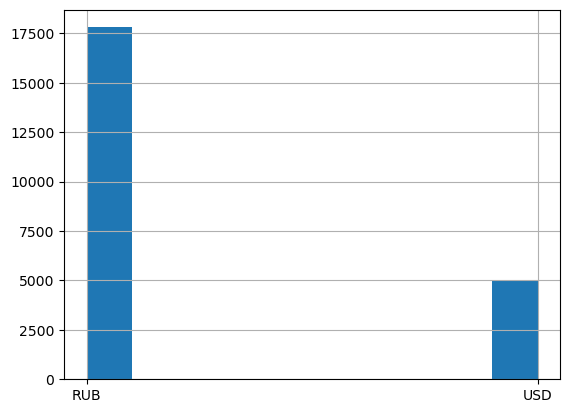

In [14]:
df['currency'].hist()

### Renderhours

Заполним время рендера заглушкой с нулевым временем

In [15]:
df['renderhours'] = df['renderhours'].fillna('00:00:00')

### Cost

Удалим данные с 0 стоимостью покупки.

In [16]:
df = df[df['cost']>0]

## Изменение значений данных 

Приведем к одному типу валюты на основании допущении о средней стоиомсти доллара 75 рублей

In [17]:
df['cost_rub'] = df['cost']

In [18]:
df.loc[(df['currency'] == 'USD'), 'cost_rub'] = df['cost']*75

## Изменение типа данных

In [19]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [20]:
 # выведим информацию о наших данных
check_df(df)

##################### Размер (Shape) #####################
(21224, 10)

##################### Тип данных (Types) #####################
client_id                object
task_id                  object
product_name             object
start_time       datetime64[ns]
currency                 object
status                    int64
cost                    float64
reserved_cost           float64
renderhours              object
cost_rub                float64
dtype: object

##################### Первые 5 строк (Head) #####################


,client_id,task_id,product_name,start_time,currency,status,cost,reserved_cost,renderhours,cost_rub
0,F202354600,28f7c5ba-93dc-419d-8c78-707aba5d8bef,Blender Render,2023-01-01 01:04:10.464,RUB,301,80.0,80.0,00:04:03,80.0
1,F202121530,0a765a4b-86be-4713-9147-6a28b476798a,3ds Max Render,2023-01-01 08:19:30.731,RUB,301,64.0,64.0,00:19:32,64.0
2,F202121530,85d87a73-3639-4d07-8059-976a1c91a576,3ds Max Render,2023-01-01 08:19:30.732,RUB,301,64.0,64.0,00:27:37,64.0
3,F202121530,2aab52e1-366a-406b-aacb-a60518927cf2,3ds Max Render,2023-01-01 08:19:37.875,RUB,301,64.0,64.0,00:24:55,64.0
4,F202121530,77337863-1289-4e36-b05e-ae06b5433545,3ds Max Render,2023-01-01 08:19:37.875,RUB,301,64.0,64.0,00:22:57,64.0
5,F202121530,fcba6aa3-4ab6-4344-a852-44ed3a2b66e7,3ds Max Render,2023-01-01 08:24:48.000,RUB,301,64.0,64.0,00:23:53,64.0
6,F202121530,4108801d-00b0-4a97-b2d6-0c63fe814670,3ds Max Render,2023-01-01 08:24:58.278,RUB,301,64.0,64.0,00:23:48,64.0
7,F202121530,580a02d2-2d68-4347-b9a4-900f0a3f5cfc,3ds Max Render,2023-01-01 08:25:31.247,RUB,301,64.0,64.0,00:19:14,64.0
8,F202121530,fff19a4e-909e-4fd8-b46f-802921928e52,3ds Max Render,2023-01-01 08:25:31.520,RUB,301,64.0,64.0,00:16:54,64.0
9,F202121530,1282bfee-8ec2-4b6b-9bf8-b248c8677293,3ds Max Render,2023-01-01 08:25:58.726,RUB,301,64.0,64.0,00:22:19,64.0



##################### Первые 5 строк (Tail) #####################


,client_id,task_id,product_name,start_time,currency,status,cost,reserved_cost,renderhours,cost_rub
25160,F202368577,bb3aea8f-d63c-4fcd-88d1-6449e6d54a12,3ds Max Render,2023-11-24 06:04:18.731,RUB,301,80.00,90.89,00:07:10,80.00
25161,F202368577,437a26fe-1d93-40ed-ae1c-87f76efaed24,3ds Max Render,2023-11-24 06:06:47.199,RUB,301,80.00,92.38,00:07:52,80.00
25162,F202375082,a5688cca-16b4-4653-84f3-872c60ddba93,After Effects Render,2023-11-24 06:12:37.091,USD,301,1.25,45658.00,00:15:41,93.75
25163,F202375082,a85ac749-e416-4912-b350-911fb2574a65,After Effects Render,2023-11-24 06:20:47.480,USD,301,1.25,45658.00,00:20:20,93.75
25164,F202375082,a2541305-f824-4a85-ab73-2a99fae644a0,After Effects Render,2023-11-24 06:44:37.392,USD,301,1.25,45658.00,00:08:00,93.75
25165,F202362481,28d69dbd-801b-4f07-8980-c59c77faba0e,Cinema4D Render,2023-11-24 07:20:16.147,RUB,301,32.00,32.00,00:01:31,32.00
25166,F202375082,cc398fab-99ef-48d6-8b83-dfe65da5a44b,After Effects Render,2023-11-24 07:58:36.813,USD,301,1.25,45658.00,00:06:25,93.75
25167,F202375082,13914224-f7bc-42ad-8119-4ac0259fdaea,After Effects Render,2023-11-24 08:00:48.398,USD,301,1.25,45658.00,00:06:10,93.75
25169,F202375082,af4d0fe3-17cf-4b64-b5bf-cc27baf3d00a,After Effects Render,2023-11-24 08:11:47.279,USD,301,1.25,45658.00,00:05:50,93.75
25170,F202375082,85029ee6-cbde-46d3-b15c-ef794fcf2b48,After Effects Render,2023-11-24 08:19:27.251,USD,301,1.25,45658.00,00:04:40,93.75



##################### Пропуски (NA) #####################
client_id        0
task_id          0
product_name     0
start_time       0
currency         0
status           0
cost             0
reserved_cost    0
renderhours      0
cost_rub         0
dtype: int64

##################### Квантили (Quantiles) #####################
                 count         mean           std     min      0%       5%  \
status         21224.0   301.142386      0.349454  301.00  301.00  301.000   
cost           21224.0   158.335327    691.723123    0.01    0.01    1.250   
reserved_cost  21224.0  6847.597809  15264.604863    0.00    0.00   21.926   
cost_rub       21224.0   268.210055    924.254858    0.19    0.19   42.366   

                   50%         95%         99%      100%       max  
status         301.000    302.0000    302.0000    302.00    302.00  
cost            80.000    471.1330   1490.0005  35326.48  35326.48  
reserved_cost   93.175  45658.0000  45658.0000  47300.00  47300.00  
cost_

#### Промежуточный вывод:
    - в резултате обра,отки данных были оставkенны данные со статусом 302 и 301
    - были заполнены пропуски.
    - был создан столбец cost_rub приведенный к одной валюте RUB, на допущении о средней стоимости доллара 75 рублей

# Аннализ данных

In [21]:
# посчитаем количество покупок по id
df['client_id'].value_counts()

F201911518    1336
F202240642    1206
F20205459      800
F202121530     750
F202244052     483
              ... 
F202365441       1
F202365440       1
F202365426       1
F202358824       1
F202364529       1
Name: client_id, Length: 3221, dtype: int64

In [22]:
# выведем дату последней покупки
df["start_time"].max()

Timestamp('2023-11-24 08:19:27.251000')

In [23]:
# выведем дату первой покупки
df["start_time"].min()

Timestamp('2023-01-01 01:04:10.464000')

In [24]:
# назначим дату от которой буем отсчитывать насколько давно была сдлеана покупка
today_date = dt.datetime(2023, 12, 1)

In [25]:
# сгрупируем данные по картам
rfm_0 = df.groupby("client_id").agg({"start_time": lambda date: (today_date - date.max()).days,
                              "task_id": lambda check: check.nunique(),
                              "cost_rub": lambda cost: cost.sum()})

In [26]:
#check
rfm_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3221 entries, F20131169 to F202375082
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_time  3221 non-null   int64  
 1   task_id     3221 non-null   int64  
 2   cost_rub    3221 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 100.7+ KB


In [27]:
rfm_0

,start_time,task_id,cost_rub
client_id,,,
F20131169,50,203,18749.87
F20131566,64,19,2893.38
F20131672,137,2,379.58
F20131705,127,4,1090.93
F20141045,55,72,63369.95
...,...,...,...
F202375027,7,1,93.75
F202375032,7,1,93.75
F202375035,7,1,93.75


#### Коментарий:
   - 1-я колонка ID
   - 2-я как давно совершил последнюю покупку
   - 3-я сколько было уникальных задач запущено
   - 4-я скольо денег потрачено всего

In [147]:
# Создадим копию полученной таблицы
rfm = rfm_0.copy()

**Recency** — давность (как давно ваши пользователи что-то у вас покупали);

**Frequency** — частота (как часто они у вас покупают);

**Monetary** — деньги (общая сумма покупок).

In [148]:
# Поменяем название колонок
rfm.columns = ['Давность', 'Частота', 'Деньги']

Выведем таблицу отсортированную по деньгам

In [149]:
rfm.sort_values(by=['Деньги'], ascending=False).head(10)

,Давность,Частота,Деньги
client_id,,,
F201911518,8,1336,305242.47
F202366563,147,27,197680.05
F202240642,7,1206,176032.10
F202362712,141,37,131312.76
F201910152,147,141,104887.92
F20207796,9,283,101836.50
F202012074,47,151,99843.75
F202130217,26,50,93265.56
F20205459,8,800,83226.75


In [150]:
fig = px.histogram(rfm, x='Давность', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Распеределние давности посещения покупателями',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [151]:
fig = px.histogram(rfm, x='Деньги', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Распределение оплат покупателями',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [152]:
fig = px.histogram(rfm[rfm['Деньги']<1000], x='Деньги', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Распределение оплат покупателями меньше 1 000',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [153]:
# которые потратили больше 1 000 руб.
rfm[rfm['Деньги']>1000].sort_values(by=['Деньги'])

,Давность,Частота,Деньги
client_id,,,
F202357700,281,6,1004.02
F202369991,93,3,1004.51
F202360094,241,7,1009.50
F202361194,224,4,1013.54
F202361979,212,2,1014.04
...,...,...,...
F201910152,147,141,104887.92
F202362712,141,37,131312.76
F202240642,7,1206,176032.10


In [154]:
fig = px.histogram(rfm, x='Частота', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Распределение частоты покупок',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [155]:
fig = px.histogram(rfm[rfm['Частота']<15], x='Частота', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Распределение частоты покупок не более 10 покупок',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [158]:
rfm['R_Rank']= rfm['Давность'].rank(ascending=False)
rfm['F_Rank']= rfm['Частота'].rank(ascending=True)
rfm['M_Rank']= rfm['Деньги'].rank(ascending=True)

['Давность', 'Частота', 'Деньги']

In [159]:
rfm['Давность_norm']=(rfm['R_Rank']/rfm['R_Rank'].max())*100
rfm['Частота_norm']=(rfm['F_Rank']/rfm['F_Rank'].max())*100
rfm['Деньги_norm']=(rfm['M_Rank']/rfm['M_Rank'].max())*100

In [160]:
rfm.drop(columns=['F_Rank', 'F_Rank', 'M_Rank'],inplace=True)

In [161]:
rfm

,Давность,Частота,Деньги,R_Rank,Давность_norm,Частота_norm,Деньги_norm
client_id,,,,,,,
F20131169,50,203,18749.87,2792.5,86.777502,99.627445,98.075132
F20131566,64,19,2893.38,2654.0,82.473586,95.886371,91.927973
F20131672,137,2,379.58,1967.0,61.124922,69.745421,76.622167
F20131705,127,4,1090.93,2060.0,64.014916,85.641105,86.743247
F20141045,55,72,63369.95,2737.5,85.068365,98.447687,99.503260
...,...,...,...,...,...,...,...
F202375027,7,1,93.75,3203.5,99.549410,30.751319,33.328159
F202375032,7,1,93.75,3203.5,99.549410,30.751319,33.328159
F202375035,7,1,93.75,3203.5,99.549410,30.751319,33.328159


### Вычисление Оценок

In [165]:
rfm['RFM_SCORE']=0.15*rfm['Давность_norm'] +0.28* rfm['Частота_norm']+0.57*rfm['Деньги_norm']

In [167]:
rfm['RFM_SCORE'] *=  0.05

In [168]:
rfm[['RFM_SCORE']].sort_values(by='RFM_SCORE' ,ascending=False)

,RFM_SCORE
client_id,
F202240642,4.994416
F201911518,4.992076
F2018880,4.985397
F20205459,4.984128
F202237759,4.983830
...,...
F202354778,0.716530
F202354715,0.716530
F202253395,0.713151


In [169]:
rfm['Customer_Segments']= np.where(rfm['RFM_SCORE']>4.5,'Top_Customers',
                                   np.where(rfm['RFM_SCORE']>4,'High_Value_Customers',
                                            np.where(rfm['RFM_SCORE']>3,'Medium_Value_Customers',
                                                     np.where(rfm['RFM_SCORE']>1.6,'Low_ValueCustomers', 'Lost_Customers'))))

In [171]:
rfm[['RFM_SCORE','Customer_Segments']]

,RFM_SCORE,Customer_Segments
client_id,,
F20131169,4.840757,Top_Customers
F20131566,4.580908,Top_Customers
F20131672,3.618605,Medium_Value_Customers
F20131705,4.151270,High_Value_Customers
F20141045,4.852123,Top_Customers
...,...,...
F202375027,2.126992,Low_ValueCustomers
F202375032,2.126992,Low_ValueCustomers
F202375035,2.126992,Low_ValueCustomers


In [176]:
fig = px.histogram(rfm, x='Customer_Segments', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Распределение сегментов',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [178]:
rfm_=rfm[['Давность','Частота','Деньги','Customer_Segments','RFM_SCORE']]
rfm_.head(50)

,Давность,Частота,Деньги,Customer_Segments,RFM_SCORE
client_id,,,,,
F20131169,50,203,18749.87,Top_Customers,4.840757
F20131566,64,19,2893.38,Top_Customers,4.580908
F20131672,137,2,379.58,Medium_Value_Customers,3.618605
F20131705,127,4,1090.93,High_Value_Customers,4.151270
F20141045,55,72,63369.95,Top_Customers,4.852123
F20141276,19,31,11557.84,Top_Customers,4.825734
F2014131,7,117,45707.54,Top_Customers,4.962997
F201415,161,2,1451.75,Medium_Value_Customers,3.896133
F201480,224,5,652.59,Medium_Value_Customers,3.859518


In [179]:
# Созрание сегментов в файл
try:
    rfm.to_csv("/Users/georgijusynin/Documents/DataScientist/Turbo/rfm_2023.csv")
    rfm.to_excel("/Users/georgijusynin/Documents/DataScientist/Turbo/rfm_2023.xlsx")
except:
    rfm.to_csv("/Users/a1/Documents/DataScientist/Turbo/rfm_2023.csv")
    rfm.to_excel("/Users/a1/Documents/DataScientist/Turbo/rfm_2023.xlsx")

In [181]:
x = rfm['Customer_Segments'].value_counts()
fig = px.treemap(x, path=[x.index], values=x)
fig.update_layout(title_text='Распределение сегментов', title_x=0.5,
                  title_font=dict(size=20))
fig.update_traces(textinfo="label+value+percent root")
fig.show();

In [565]:
# Segment Analysis
fig = px.scatter(rfm, x='Давность', y='Частота', color='Сегмент', title='RFM Сегменты')
fig.show()

<Figure size 2000x1500 with 0 Axes>

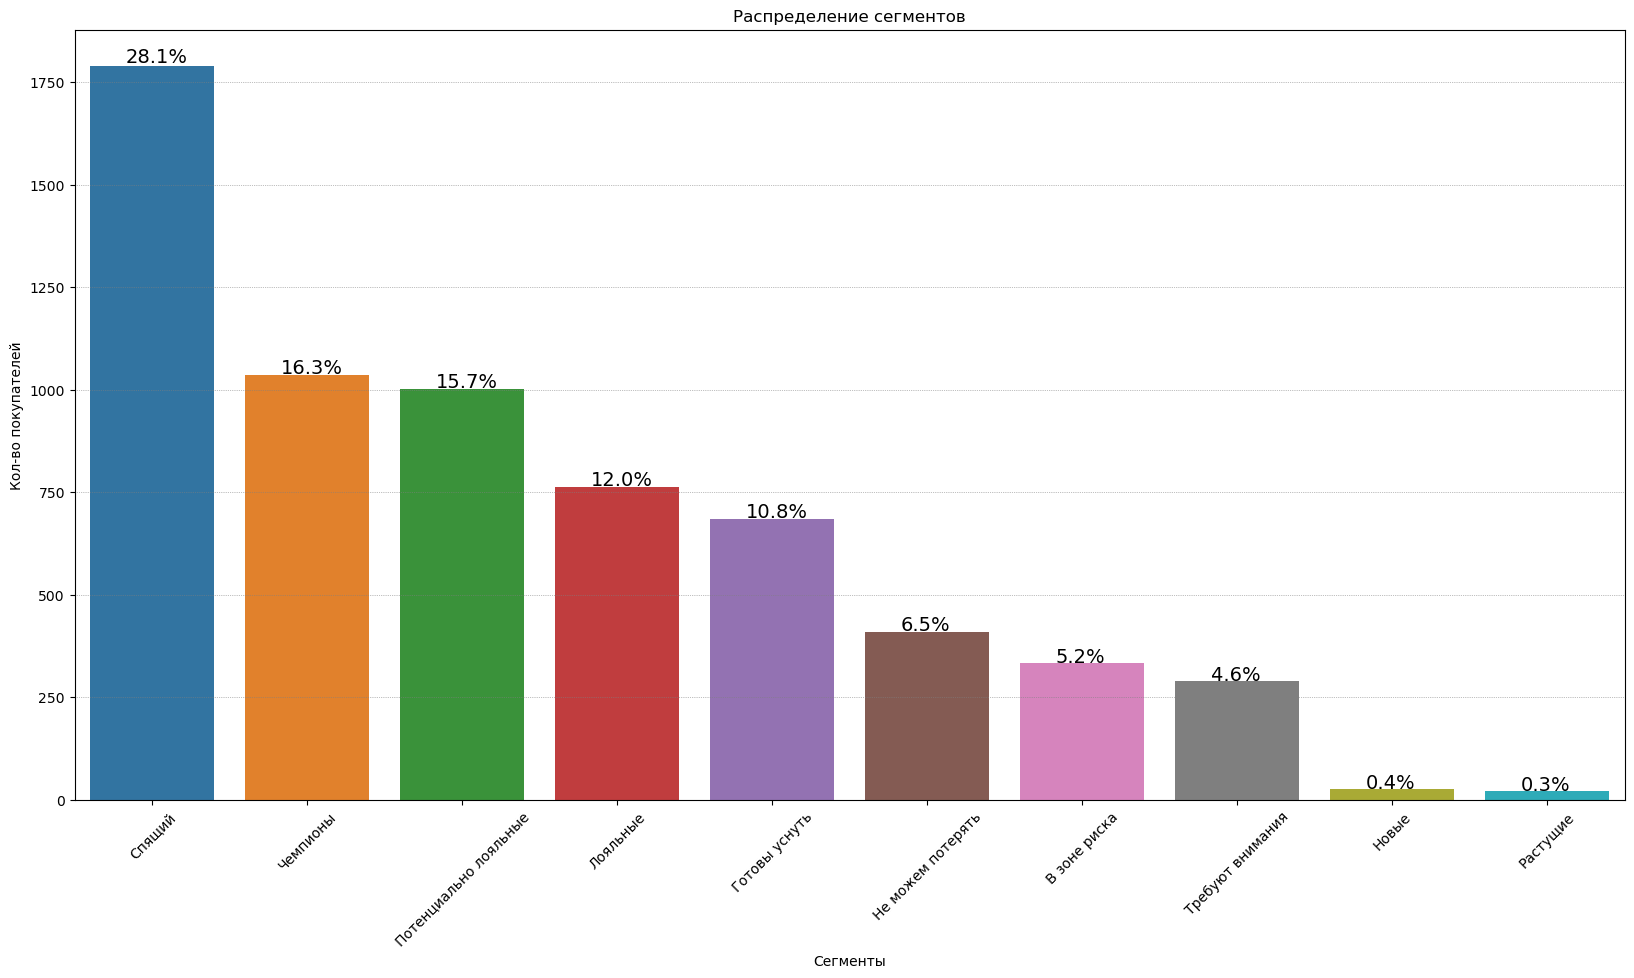

In [566]:
# График распределения покупателей по сегмнетам
segment_counts = rfm['Сегмент'].value_counts()
plt.figure(figsize=(20,15))
fig, ax = plt.subplots(figsize=(20,10))

ax.grid(ls="dotted",lw=0.5,color="grey",zorder=1)

# bar_ap = sns.countplot(data = rfm, x = 'Сегмент')
bar_ap = sns.barplot(x=segment_counts.index, y=segment_counts.values)

total = len(rfm['Сегмент'])
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)

bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)

plt.title('Распределение сегментов')
plt.xlabel('Сегменты')
plt.ylabel('Кол-во покупателей')
plt.xticks(rotation=45)
plt.show()

### Как RFM увеличивает лояльность клиентов и их вовлеченность в бизнес?

Если вы запускаете программу лояльности, Чемпионы, Лояльные и Потенциальные лояльные клиенты – сегменты, на которые стоит делать упор в продвижении программы лояльности в первую очередь. Хотите сделать их опыт взаимодействия с вашим брендом более приятным и запоминающимся?

Используйте follow-up c ограниченными по времени предложениями – так шанс их скорой повторной покупки увеличиваться в разы. Рассылка с полезным образовательным/информационным контентом также увеличит их вовлеченность в ваш бренд.

### Как RFM снижает уровень потерянных клиентов?

На Грани риска и Спящие – два сегмента клиентов, на которых стоит обратить особое внимание.

Рассылка персонализированных сообщений и звонки помогает вернуть их «в строй». Также предлагайте таким клиентам повторить их предыдущие покупки со скидкой, или опросите таких клиентов об их мнении о вашем бренде – прежде чем они уйдут от вас к конкуренту.

### Плюсы RFM-анализ

- Благодаря RFM вы узнаете больше о каждом сегменте, а каждом клиенте в целом, также о том – кто ваши лучшие покупатели;
- RFM помогает выстраивать высокоэффективные таргетированные рекламные кампании;
- RFM помогает улучшить клиентский опыт и лояльность;
- При комбинировании с другими маркетинговыми инструментами, дает детализированную аналитику по клиентам и полезные выводы на ее основе;
- RFM снижает стоимость маркетинговых активностей за счет оптимизации целевой аудитории;
- Снижает процент негативной реакции клиентов на рекламу за счет оптимизации целевой аудитории.

## Рекомендации по работе с клиентами

#### Чемпионы:
*Поведение:*
Недавно покупали, покупают часто и больше всех

*Как работать:*
Награждайте их. Например: сделайте из них фокус группу для нового продукта, информировав о новинке и спросить отзыв.

#### Лояльные:
*Поведение:*
Делают частые покупки на крупные суммы, хорошо реагируют на рекламу

*Как работать:*
Продавайте им более дорогие позиции. Просите оставить отзыв в сети.

#### Требуют внимания:
*Поведение:*
Уровень давности выше среднего, частота и сумма покупок на среднем уровне. Могут не совершать покупки в последнее время.

*Как работать:*
Предлагайте ограниченные по времени акции. Рекомендуйте товары/услуги на основе прошлых покупок. Реактивируйте их.

#### Растущие:
*Поведение:*
Недавно покупали, но не на крупные суммы

*Как работать:*
Достучитесь до них с вашей концепцией. Предлагайте бесплатные тестеры, дегустации новинок.

#### На грани:
*Поведение:*
Показатели давности, частоты и суммы покупок ниже средней

*Как работать:*
Делитесь с ними полезной информацией, рекомендуйте популярные товары/услуги. Предлагайте скидки и промокоды, чтобы увеличить их уровень покупательской способности.

#### В зоне риска:
*Поведение:*
Ране часто тратили большие суммы, но давно у вас не были

*Как работать:*
Отправляйте персонализированные сообщения, чтобы возобновить связь с клиентом. Предложите попробовать ваши товары еще раз.
Предоставляйте полезную информацию.

#### Новички:
*Поведение:*
В последнее время совершали покупки, необязательно крупные. Низкий уровень частоты и суммы покупок, т.к. они только недавно заметили ваш бренд

*Как работать:*
Создайте устойчивое понимание бренда в голове у клиента. Дайте скидку на первую крупную трату. Сделайте так, чтобы клиент понял всю пользу ваших товаров.

#### Спящие:
*Поведение:*
Последняя покупка была очень давно.
Также низкие чек и кол-во покупок

*Как работать:*
Предложите им другие релевантные продукты, а также специальные предложения и скидки. Воссоздайте в их голове значимость вашего бренда.

In [ ]:
# def rfm_analysis(dataframe, csv = False):
#     dataframe["last_order"] = pd.to_datetime(dataframe["last_order"])
#     dataframe.dtypes
#     dataframe["customer_id"] = dataframe["customer_id"].astype(str)
#     dataframe["last_order"].max()
#     today = dataframe.datetime(2023, 1, 24)

#     rfm = dataframe.groupby("customer_id").agg({"last_order": lambda x: (today - x.max()).days,
#                                          "qtt_order": lambda x: x.nunique(),
#                                          "total_spent": lambda x: x.sum()})
#     rfm.columns = ['recency', 'frequency', 'monetary']
#     rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])
#     rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
#     rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])
#     rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
#                         rfm['frequency_score'].astype(str))
#     seg_map = {
#         r'[1-2][1-2]': 'hibernating',
#         r'[1-2][3-4]': 'at_Risk',
#         r'[1-2]5': 'cant_loose',
#         r'3[1-2]': 'about_to_sleep',
#         r'33': 'need_attention',
#         r'[3-4][4-5]': 'loyal_customers',
#         r'41': 'promising',
#         r'51': 'new_customers',
#         r'[4-5][2-3]': 'potential_loyalists',
#         r'5[4-5]': 'champions'
#     }
#     rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
#     rfm = rfm[["recency", "frequency", "monetary", "segment"]]
#     rfm.index = rfm.index.astype(int)
#     if csv:
#         rfm.to_csv("rfm.csv")

#     return rfm

In [68]:
# background = "#313332"
# backgroundr = "#6D6D6D"
# text_color = "w"
# title_font="Alegreya Sans"

# plt.figure(figsize=(20,15))
# fig, ax = plt.subplots(figsize=(20,10))
# ax.patch.set_facecolor(backgroundr)
# fig.set_facecolor(backgroundr)
# fig.facecolor="white"
# fig.edgecolor="white"

# ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)
# bar_ap = sns.countplot(data = rfm,
#                    x = 'Сегмент')
# total = len(rfm['Сегмент'])
# for patch in ax.patches:
#     percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
#     x = patch.get_x() + patch.get_width() / 2 - 0.17
#     y = patch.get_y() + patch.get_height() * 1.005
#     ax.annotate(percentage, (x, y), size = 14)
# bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
# plt.title('Кол-во покупятелей по сегментам', size = 16, color=text_color)
# plt.ylabel('Кол-во', size = 14,color="white" )
# plt.xlabel("Сегмент",fontsize = 14,color="white" )
# plt.xticks(size = 15, color="white")
# plt.yticks(size = 15, color="white")
# plt.show();

In [ ]:
# # Segment Analysis
# fig = px.scatter(rfm, x='Давность', y='Частота', color='Сегмент', title='RFM Сегменты')
# fig.show()